In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sb
sys.path.append('../../../..')
import bpdev as bd
import mutagenesisfunctions as mf
from deepomics import neuralnetwork as nn
from deepomics import utils, fit, visualize, saliency

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


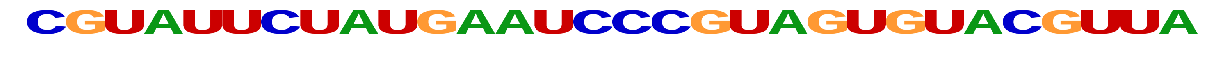

In [2]:
#Make sequence that matches structure
#each stem is 4 long

ol_A = 'CGU'
s1_A = 'AUUC'
il_A = 'UAU'
s1_B = 'GAAU'
ol_B = 'CC'
s2_A = 'CGUA'
il_B = 'GUG'
s2_B = 'UACG'
ol_C = 'UUA'

seq = ol_A + s1_A + il_A + s1_B + ol_B + s2_A + il_B +s2_B + ol_C
seqlen = len(seq)
seqhot = mf.seq_onehot([seq], alphabet='rna', gaps=False)

plt.figure(figsize=(17,2))
plt.imshow(visualize.seq_logo(seqhot[0].T, nt_width=100, alphabet='rna'))
plt.axis('off')
plt.savefig('seq.png')
plt.show()

In [7]:
seqhot[0].T.shape

# plot and save saliency
        fig = plt.figure(figsize=(10,10))
        visualize.plot_seq_pos_saliency(np.squeeze(X).T, 
                                        np.squeeze(guided_saliency[0]).T, 
                                        alphabet='dna', 
                                        nt_width=400)

(4, 30)

<Figure size 1224x360 with 0 Axes>

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


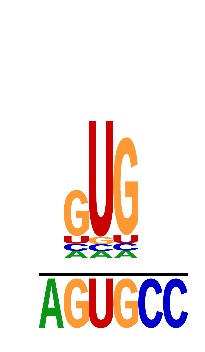

In [10]:

seq = 'AGUGCC'
seqlen = len(seq)
seqhot = mf.seq_onehot([seq], alphabet='rna', gaps=False)
saliency = np.array([[1., 1., 1., 1.],
                    [0.1, 0.1, 0.7, 0.1],
                    [0.02, 0.02, .02, 0.94],
                    [0.04, 0.04, 0.88, 0.04],
                    [1., 1., 1., 1.],
                    [1., 1., 1., 1.]
                    ])


plt.figure(figsize=(17,5))
#plt.imshow(visualize.seq_logo(seqhot[0].T, nt_width=100, alphabet='rna'))
visualize.plot_seq_pos_saliency(seqhot[0].T, 
                                        saliency.T, 
                                        alphabet='rna', 
                                        nt_width=100)
plt.axis('off')
#plt.savefig('seq.png')
plt.show()

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


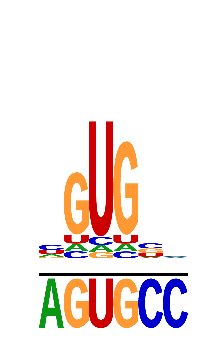

In [24]:
saliency = np.array([[0., 0., 0., 0.],
                    [0.08, 0.08, 0.82, 0.08],
                    [0.02, 0.02, .02, 0.94],
                    [0.04, 0.04, 0.88, 0.04],
                    [0., 0., 0., 0.],
                    [0., 0., 0., 0.]
                    ]).T

np.random.seed(48)
saliency += np.abs(np.random.normal(loc=0., scale=0.07, size=(4,6)))
saliency = saliency/np.sum(saliency, axis=0)

plt.figure(figsize=(5,5))
#plt.imshow(visualize.seq_logo(seqhot[0].T, nt_width=100, alphabet='rna'))
visualize.plot_seq_pos_saliency(seqhot[0].T, 
                                        saliency, 
                                        alphabet='rna', 
                                        nt_width=100)
plt.axis('off')
plt.savefig('saliency.png')
plt.show()